# Selection pass fine-tuning results.
Below charts present results of the BERT model fine-tunings.


In [1]:
import wandb
import matplotlib.pyplot as plt
import torch
import pandas as pd
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification

/home/gustaw/PycharmProjects/ZPP_Murmuras/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Initial fine-tuning.
This fine-tuning was run with 30 epochs for both "normal" and curriculum approaches.
While curruculum run on the json dataset was looking promising because of its lowering eval loss
(no overfitting), its accuracy was way too low, and ultimately I decided to exclude it from further tests.
Additionally, because of growing eval loss, further selection fine-tunings were conducted with 10 epochs only.

In [2]:
wandb.login(key='')
hf_token = ''
api = wandb.Api()

project_name = "bert_selection_ft_2"

runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc
wandb: Currently logged in as: gustaw-blachowski (sf-kozlowski-university-of-warsaw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


eval/B-COUPON_recall  eval/I-COUPON_recall  eval/samples_per_second  \
0                   NaN                   NaN                      NaN   
1                   NaN                   NaN                      NaN   
2                   NaN                   NaN                      NaN   
3                   NaN                   NaN                      NaN   
4                   NaN                   NaN                      NaN   

   eval/steps_per_second  train/loss  eval/loss  eval/overall_accuracy  \
0                    NaN      0.4912        NaN                    NaN   
1                    NaN      0.2093        NaN                    NaN   
2                    NaN      0.1270        NaN                    NaN   
3                    NaN      0.0962        NaN                    NaN   
4                    NaN      0.0560        NaN                    NaN   

   train/learning_rate  eval/recall  train/global_step    _timestamp  \
0              0.00002          NaN                 10  1.743263e+09   
1              0.00002          NaN                 30  1.743263e+09   
2              0.00002          NaN                 50  1.743263e+09   
3              0.00002          NaN                140  1.743263e+09   
4              0.00002          NaN                190  1.743263e+09   

   eval/runtime  train/epoch  train/grad_norm   _runtime  eval/f1  \
0           NaN     0.008969         1.384029   3.050821      NaN   
1           NaN     0.026906         5.403010   4.670605      NaN   
2           NaN     0.044843         1.878915   6.291213      NaN   
3           NaN     0.125561         0.851937  13.571938      NaN   
4           NaN     0.170404         1.877795  17.574333      NaN   

   eval/O_recall  eval/precision  _step  
0            NaN             NaN      0  
1            NaN             NaN      2  
2            NaN             NaN      4  
3            NaN             NaN     13  
4            NaN             NaN     18

## Training statistics.

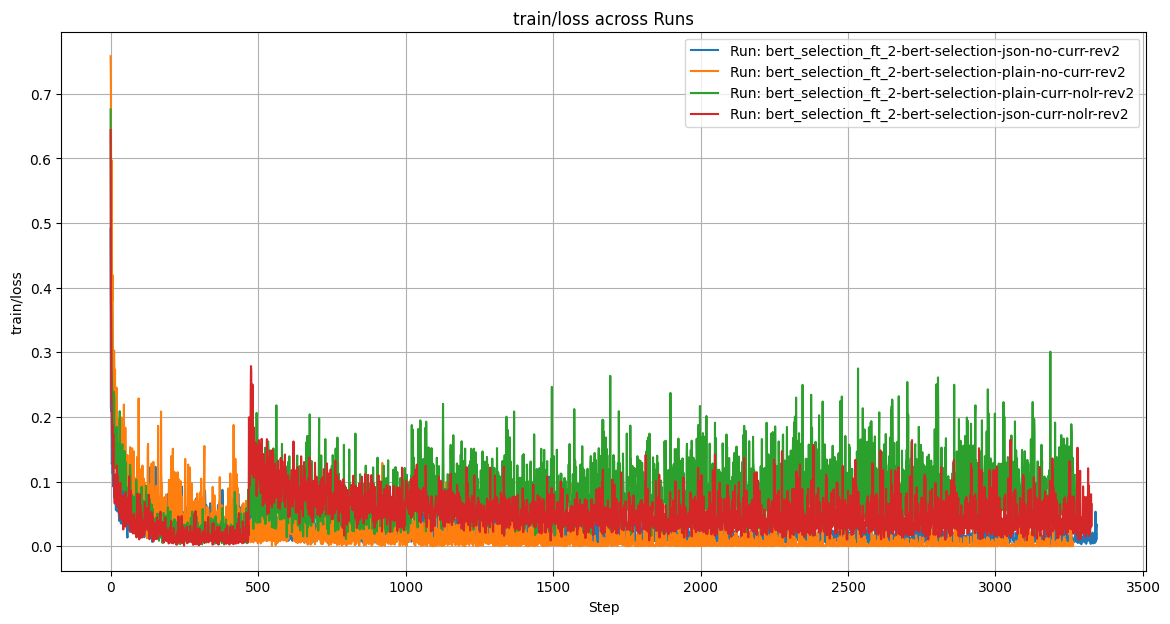

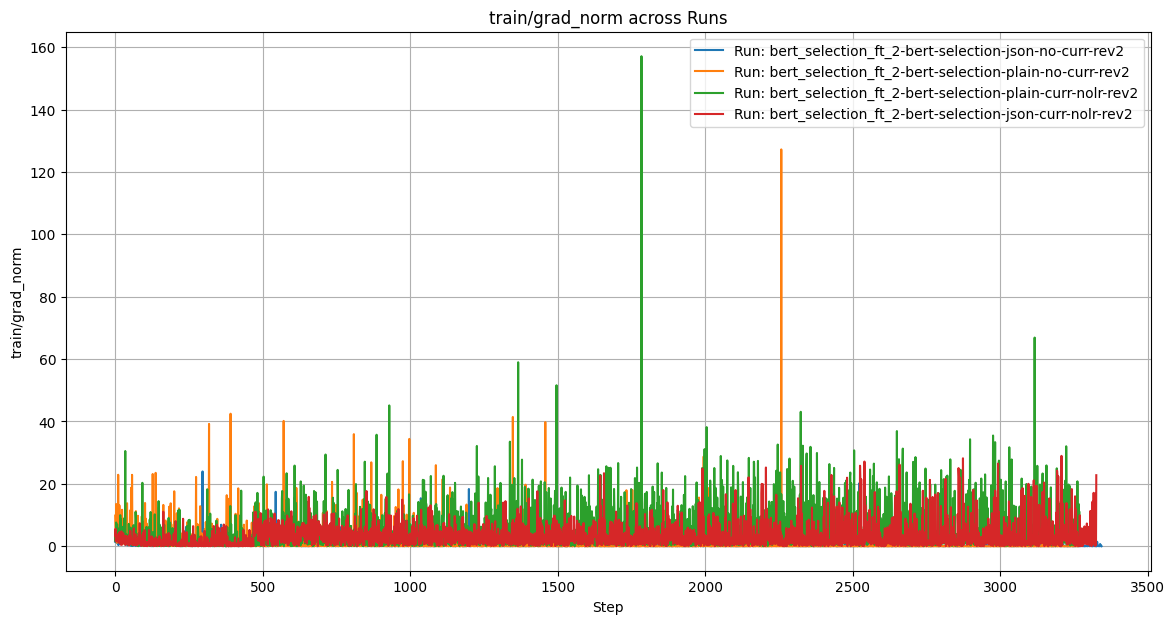

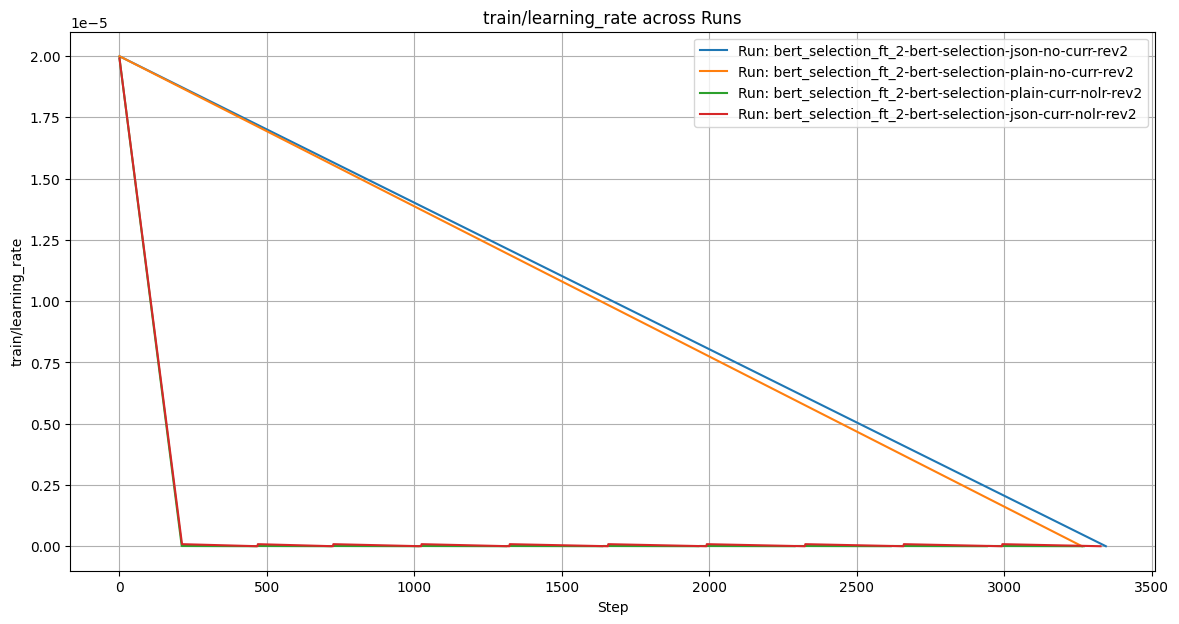

In [3]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(14, 7))
    for run in runs:
        hist = run.scan_history()
        # Convert to DataFrame
        hist_df = pd.DataFrame(hist)
        if hist_df.empty:
            continue
        if metric in hist_df.columns:
            # Filter out nans
            data = hist_df[metric].dropna()
            labels = list(range(len(data)))
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

# Evaluation statistics.

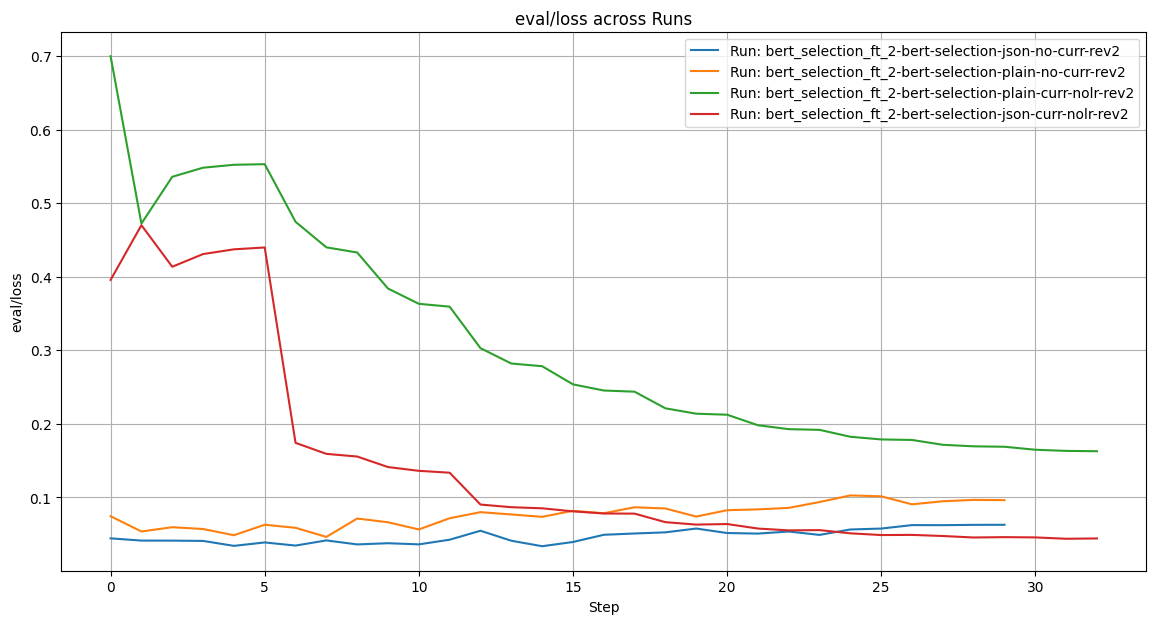

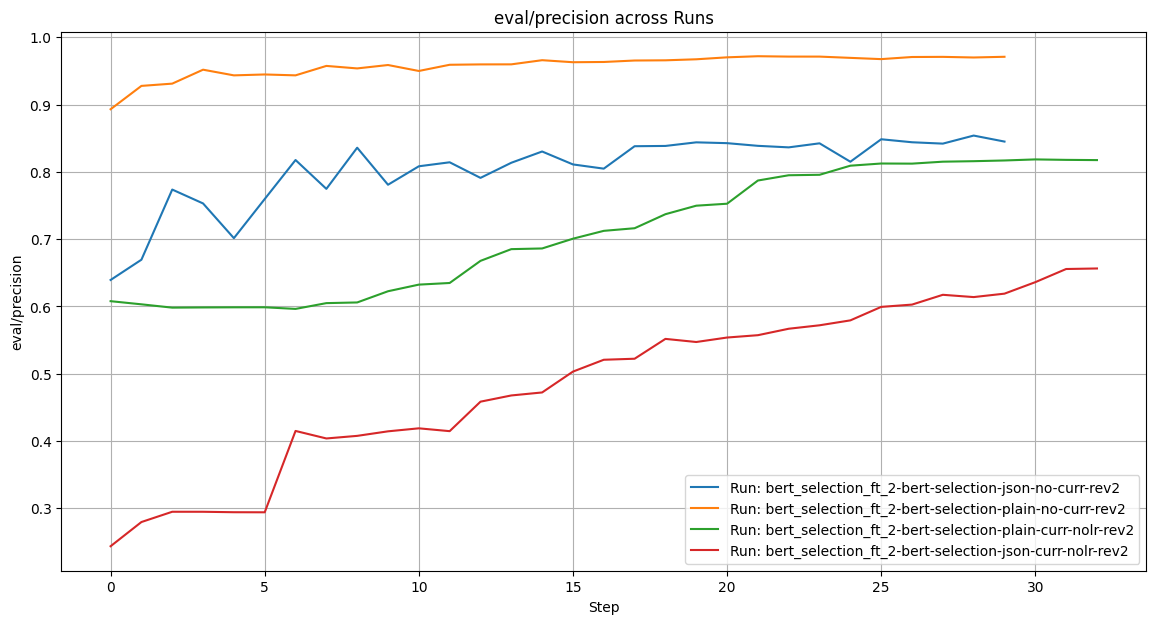

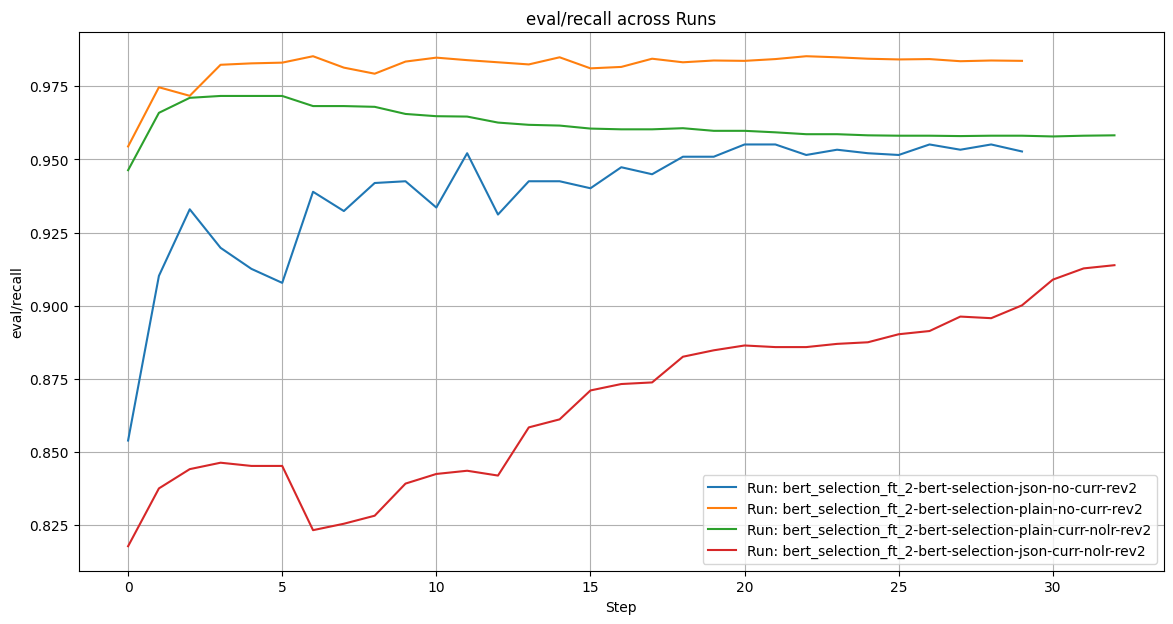

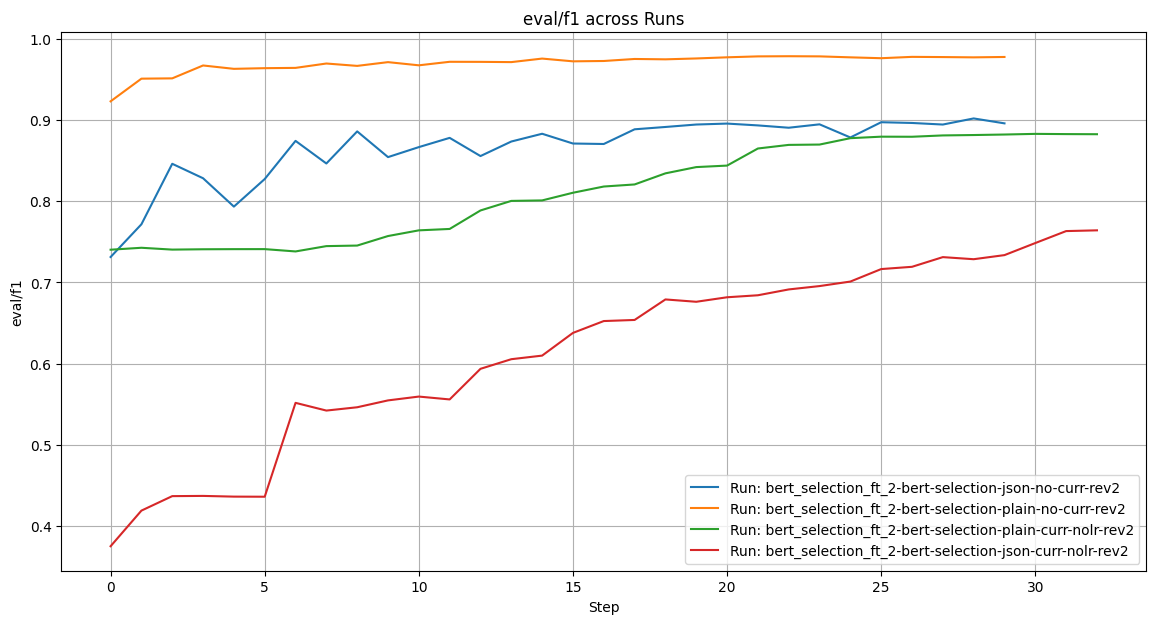

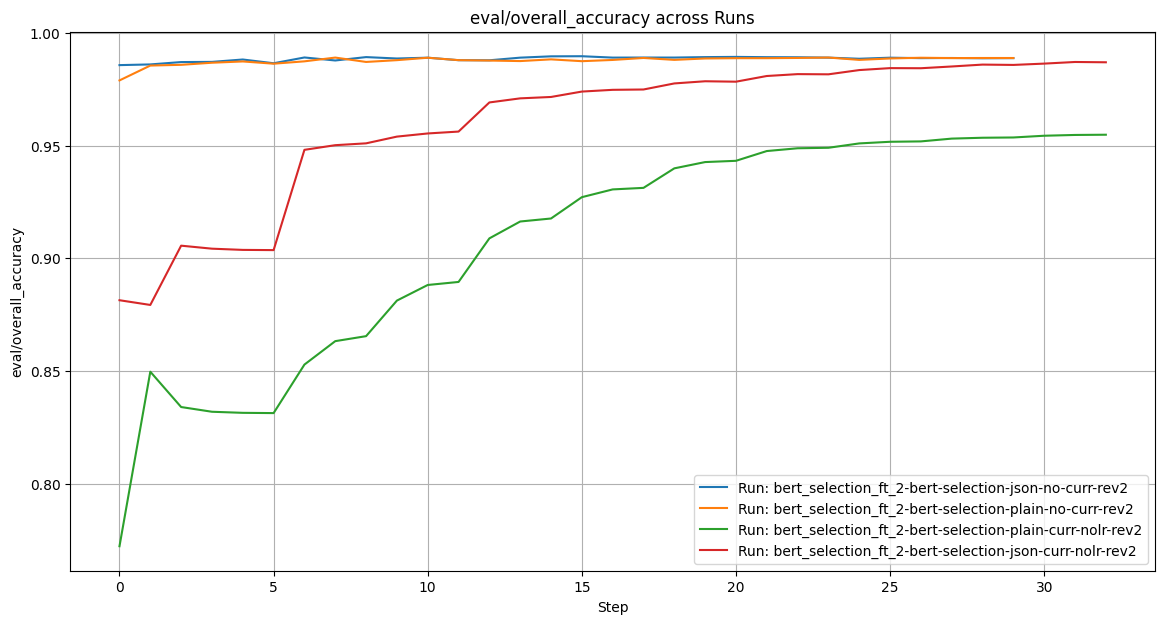

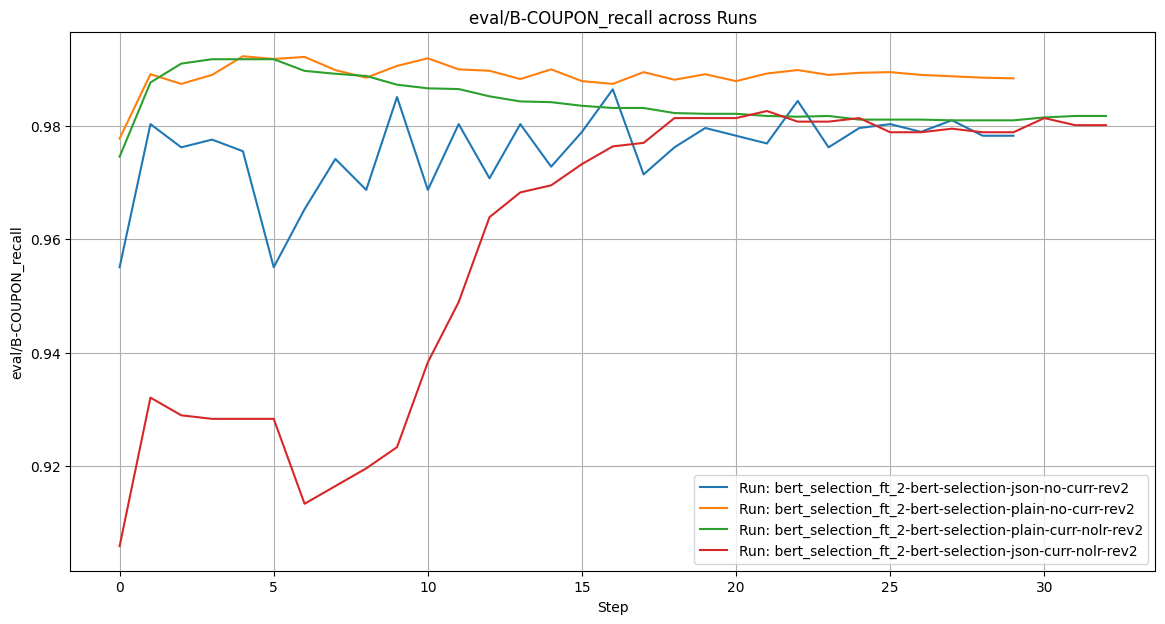

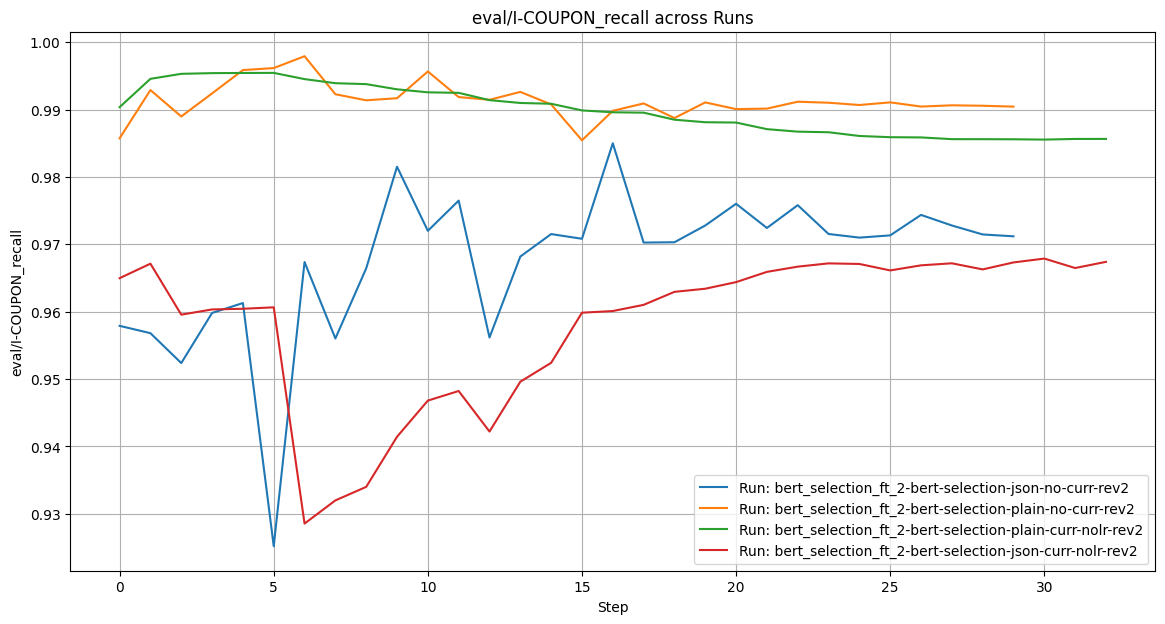

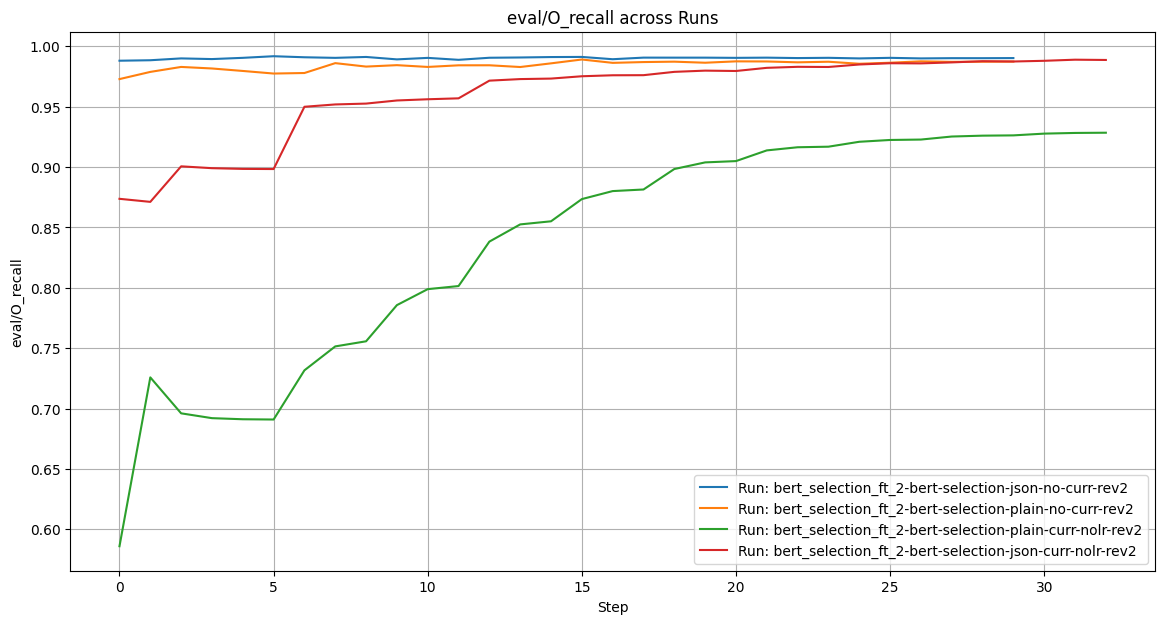

In [4]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_recall")
plot_runs_data(runs, "eval/I-COUPON_recall")
plot_runs_data(runs, "eval/O_recall")

# Fine-tunings per-app.
This fine-tunings were conducted separately for each dataset.
Model name corresponds both to the dataset type (json, plain) and to the specific app it was fine-tuned on.

In [5]:
project_name = "bert_selection_single_app_ft"
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")

## Training results.

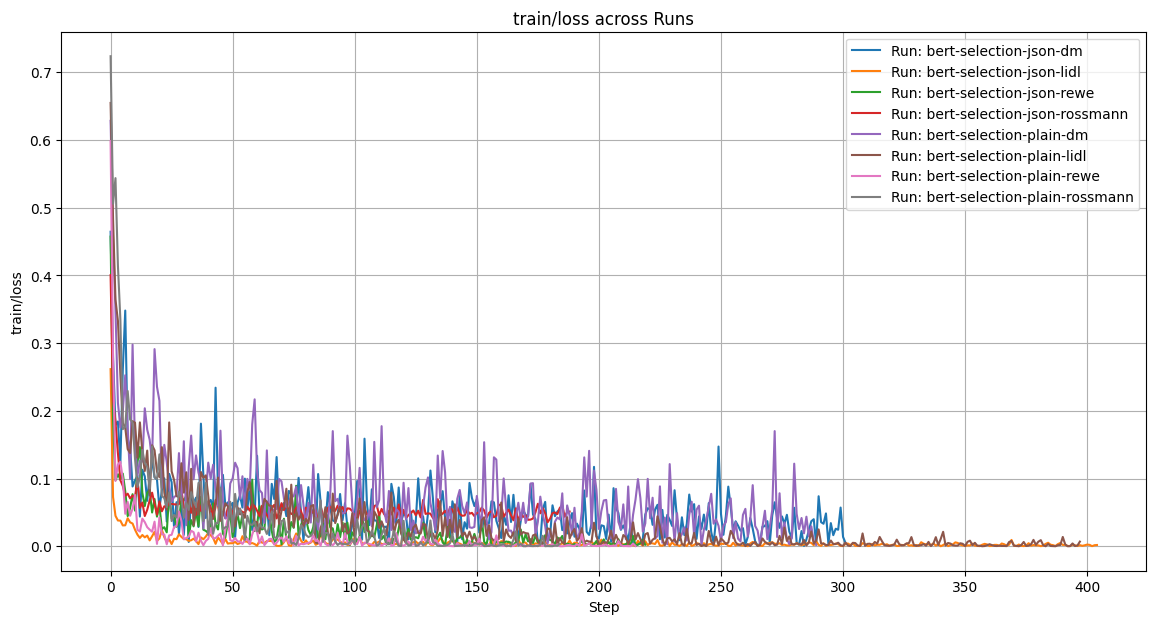

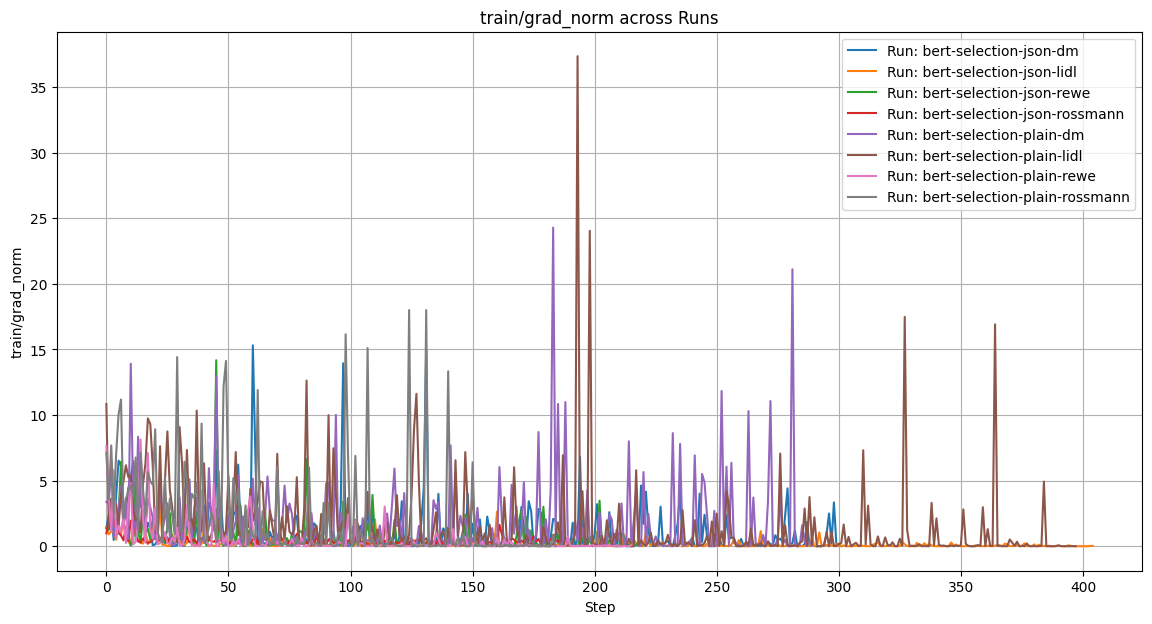

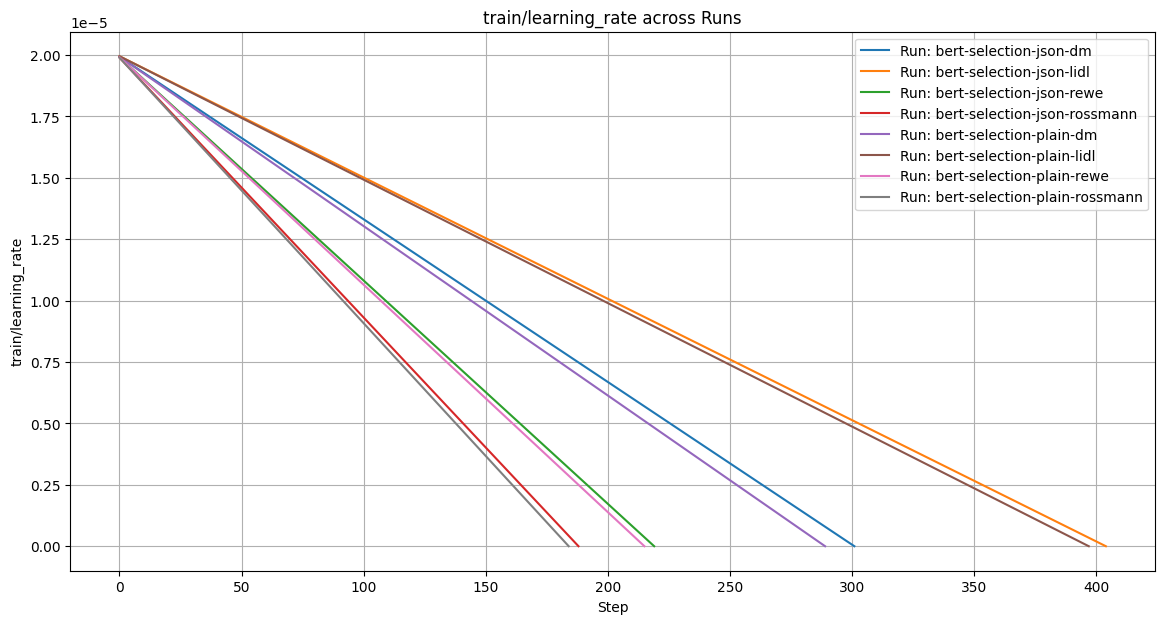

In [6]:
plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

## Evaluation results.

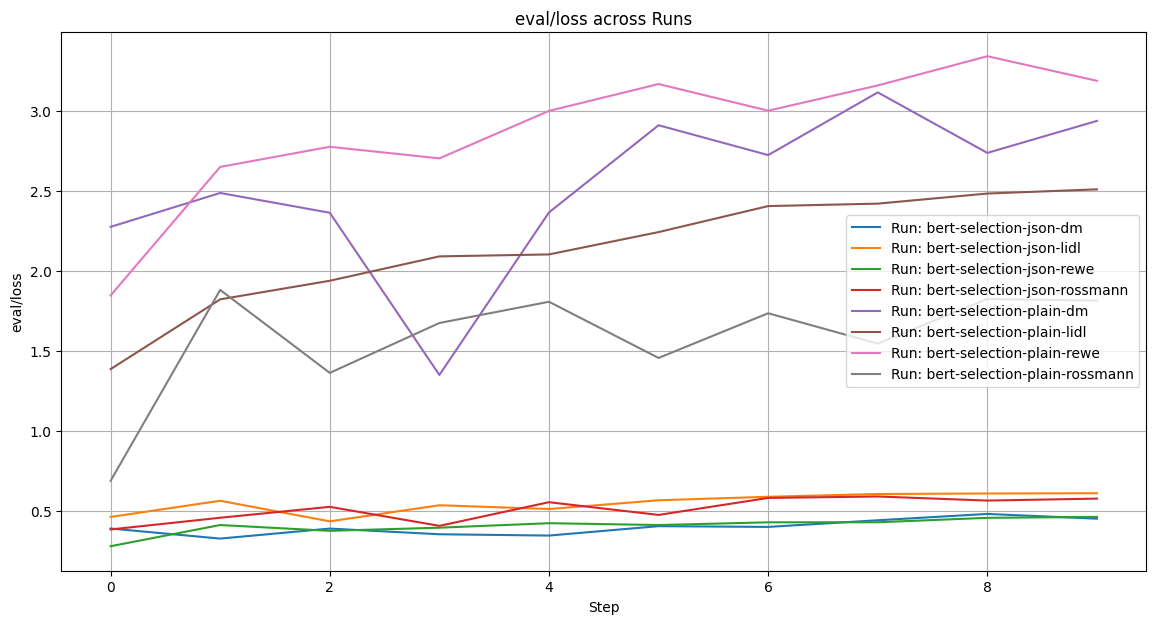

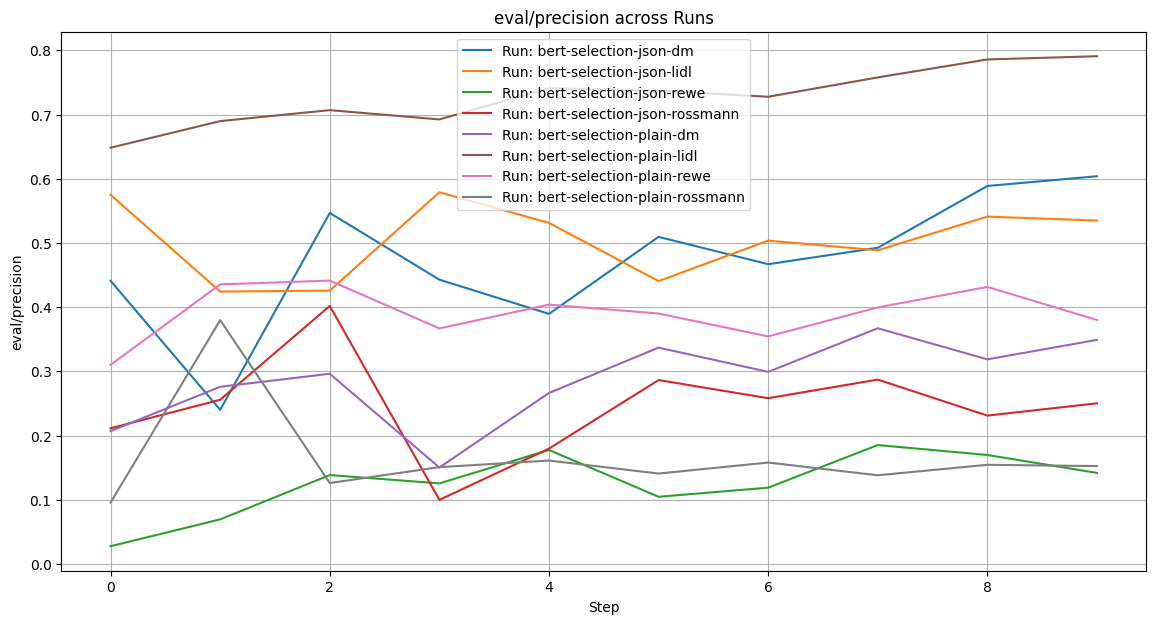

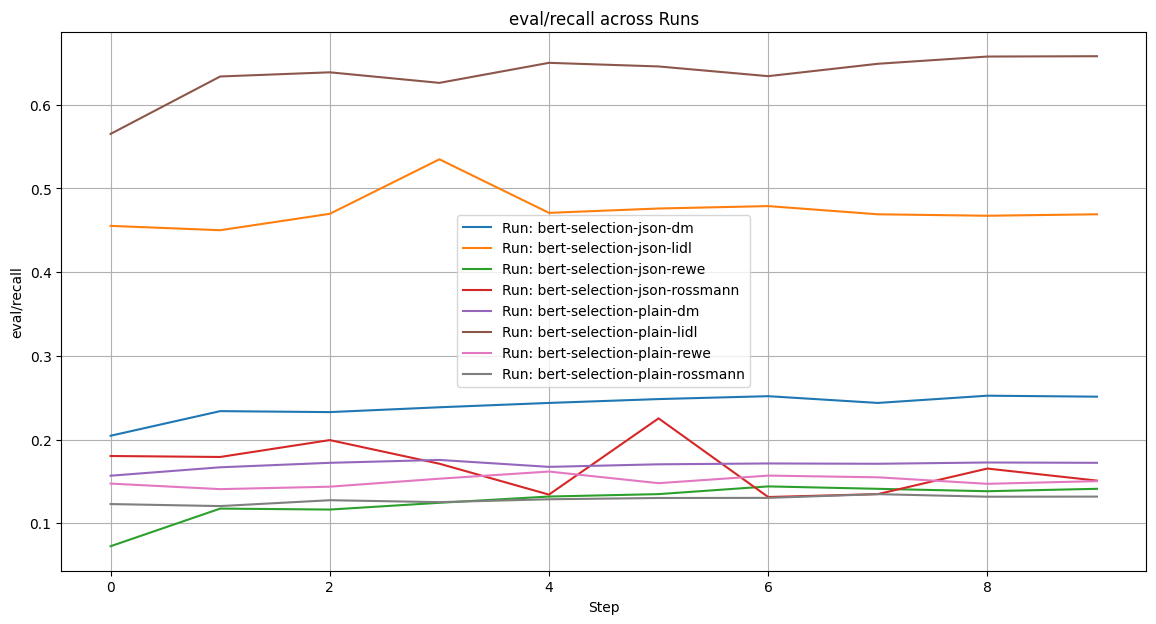

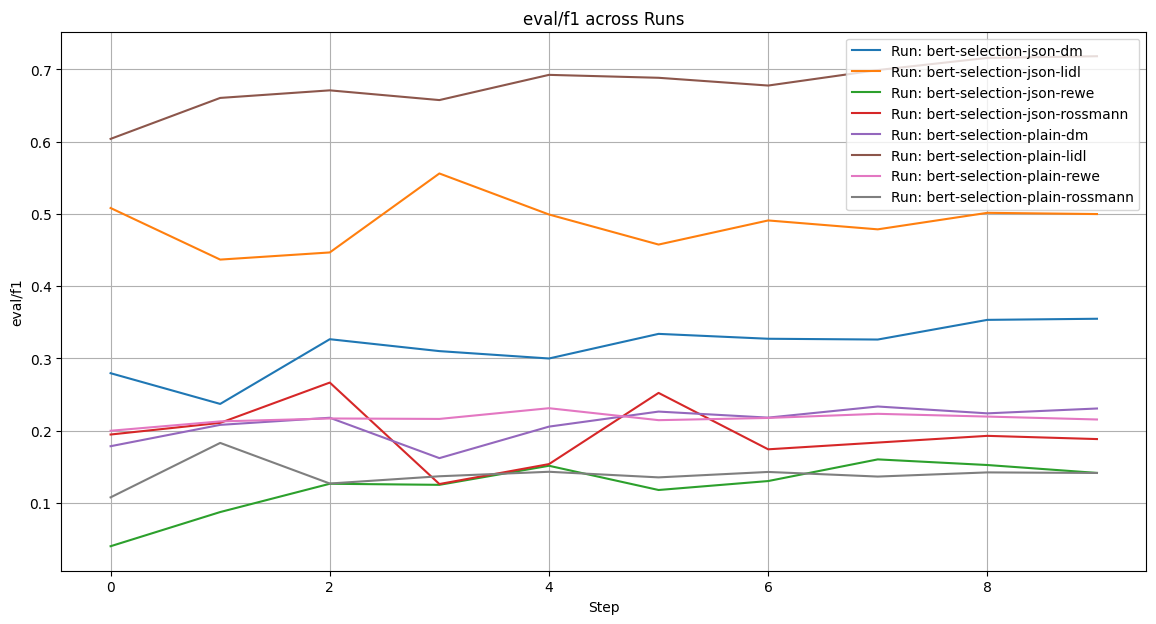

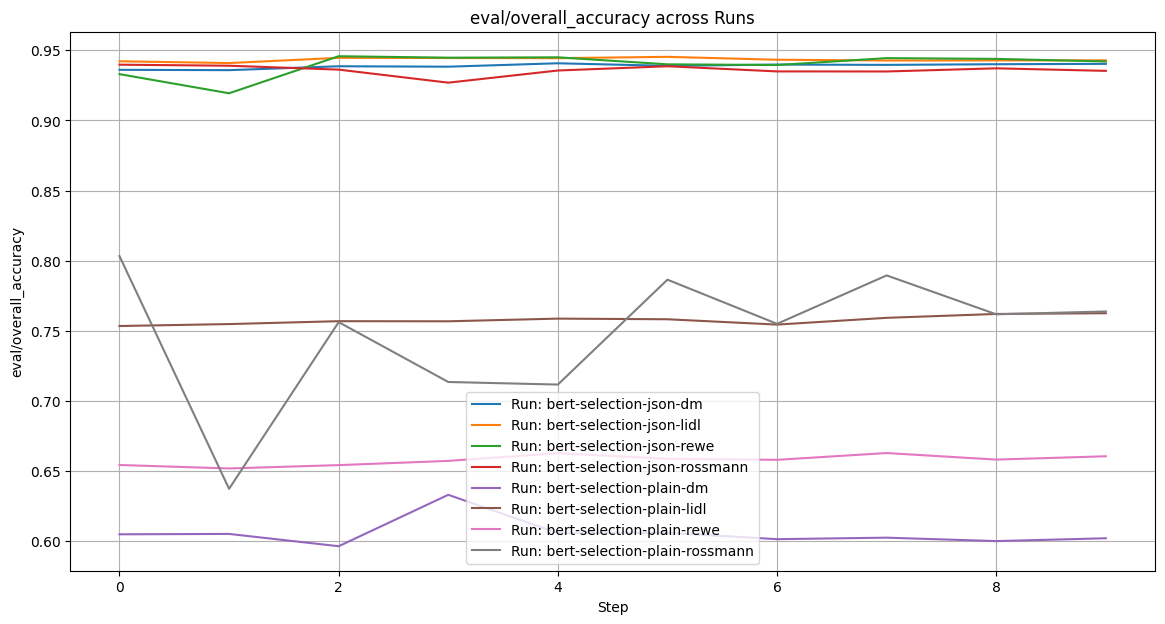

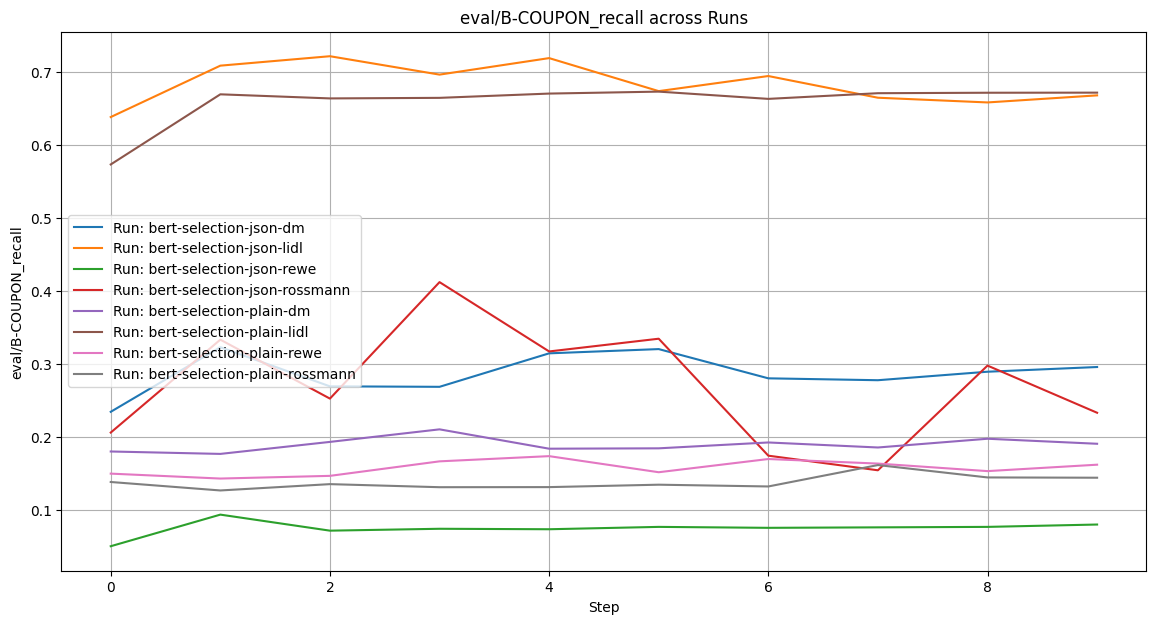

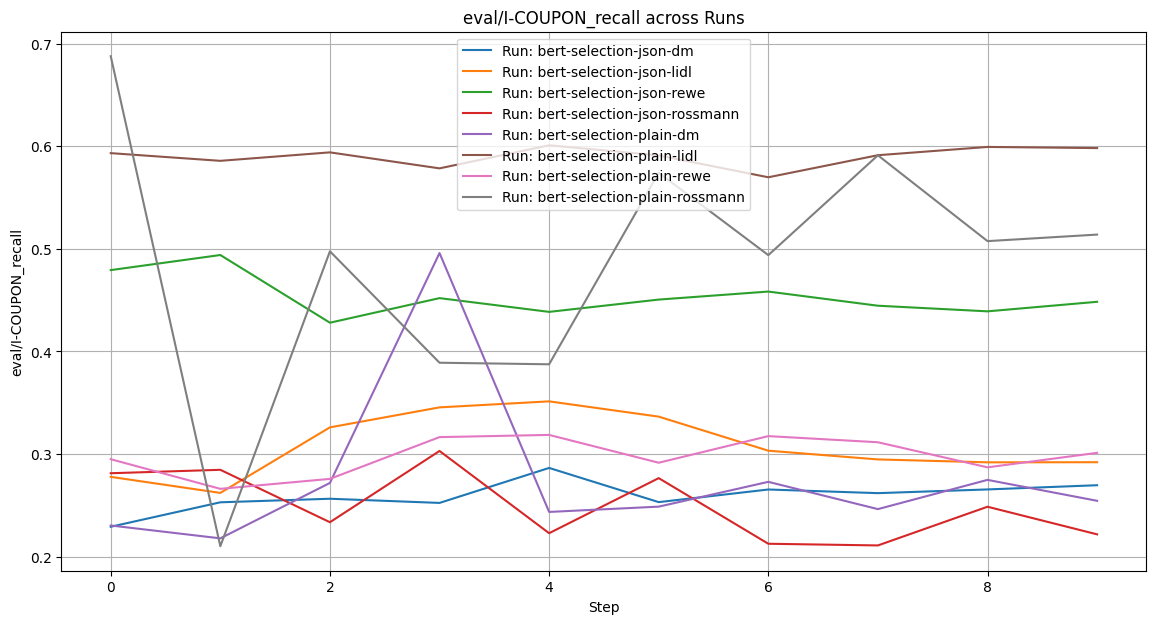

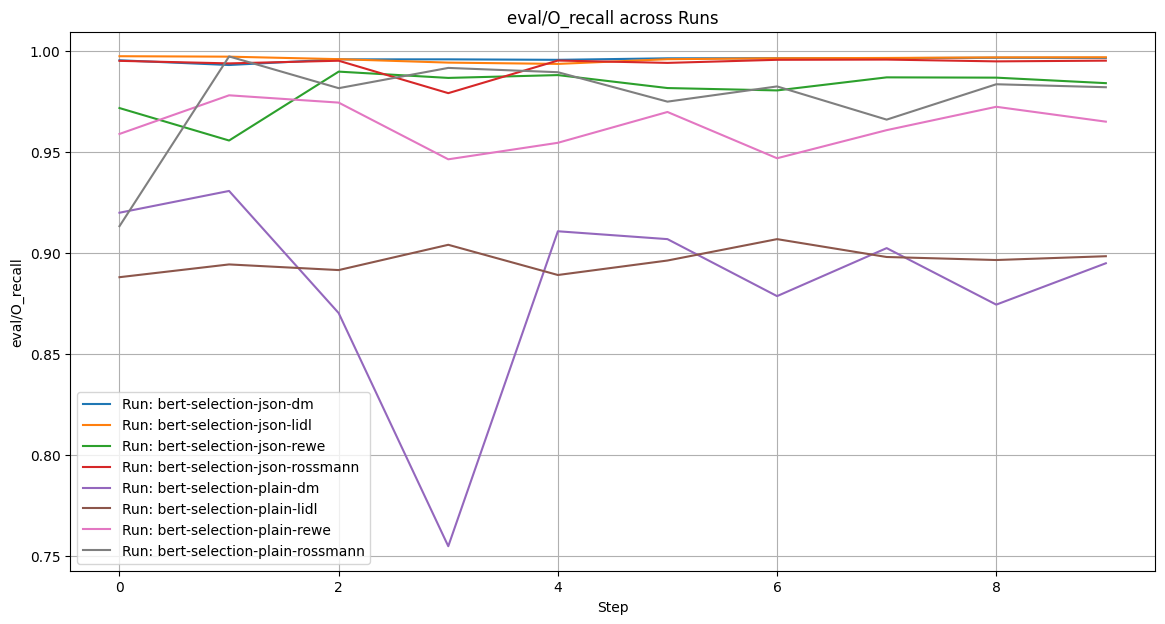

In [7]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_recall")
plot_runs_data(runs, "eval/I-COUPON_recall")
plot_runs_data(runs, "eval/O_recall")

# Incremental separate fine-tunes.
These runs were conducted in the following manner:
For plain and json datasets, model was first fine-tuned on the DM app, then
it was further fine-tuned on lidl, rewe and rossman apps.
Model name corresponds to the dataset type (plain, json) as well as the last app it was fine-tuned on
(so *-rewe means that the model was fine-tuned on DM, then lidl, then rewe).

In [8]:
project_name = "bert_selection_add_solo_ft"
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")

## Training results.

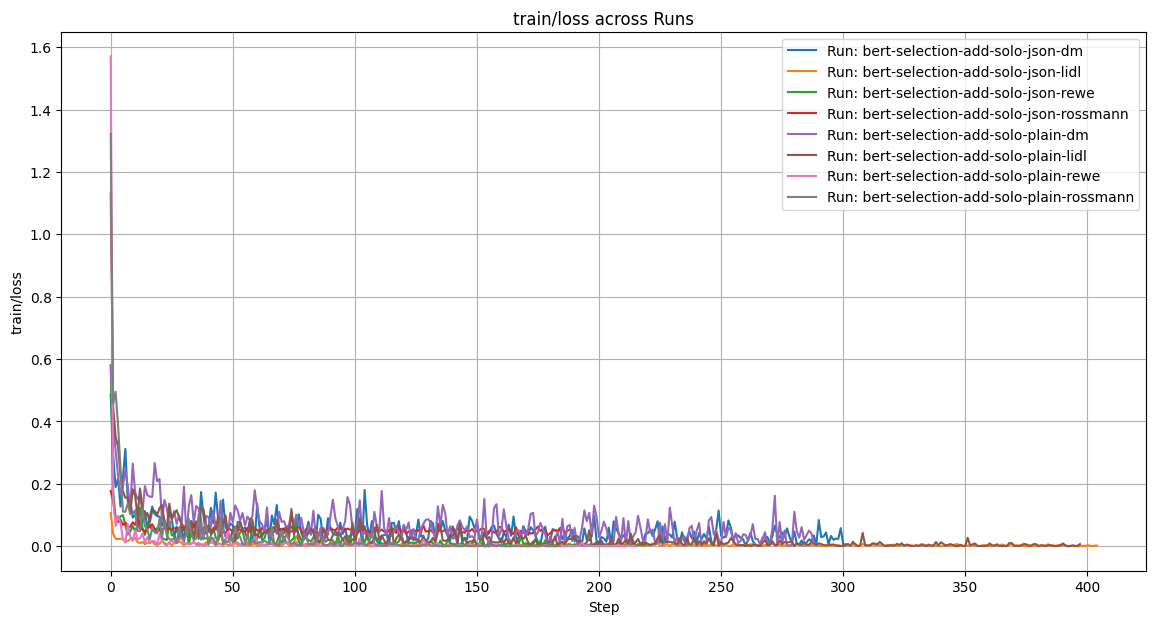

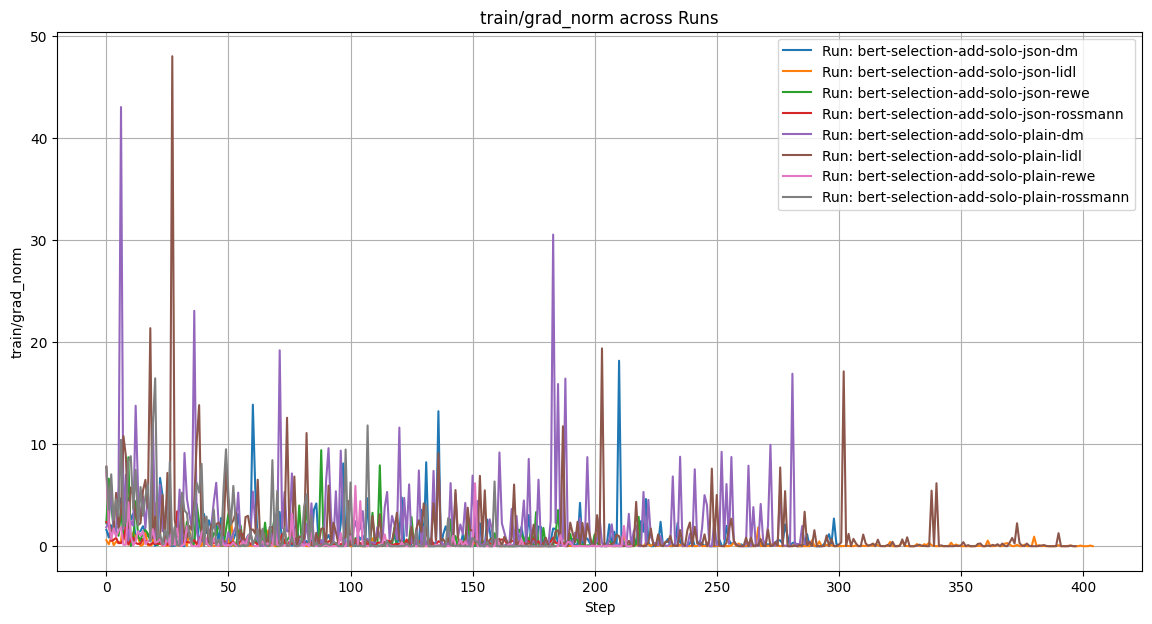

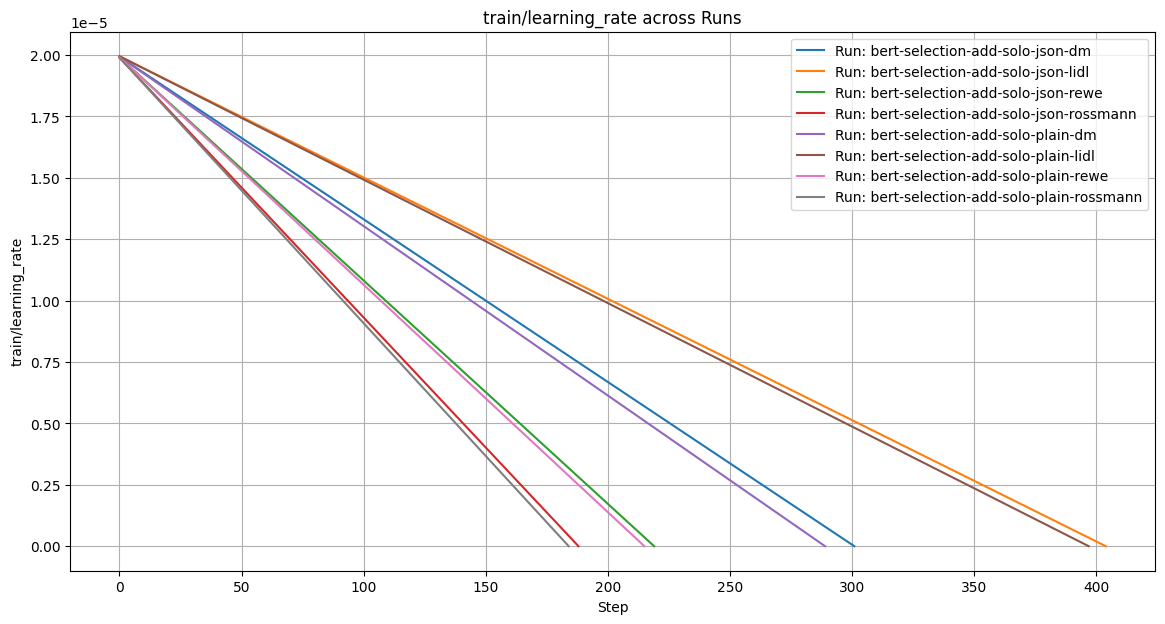

In [9]:
plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

## Evaluation results.

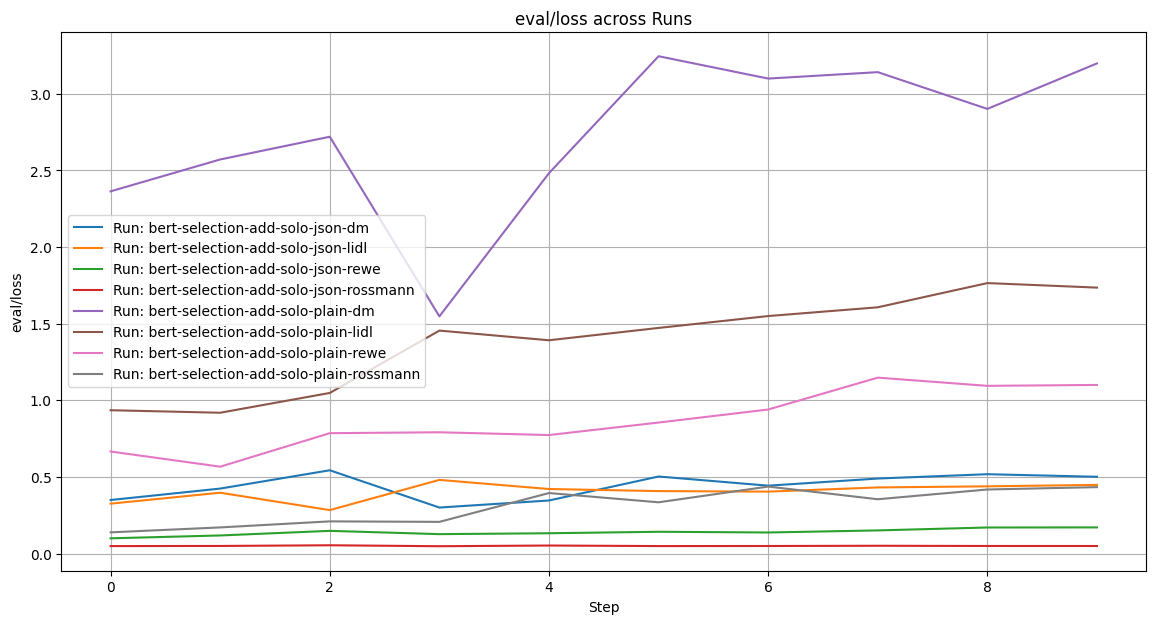

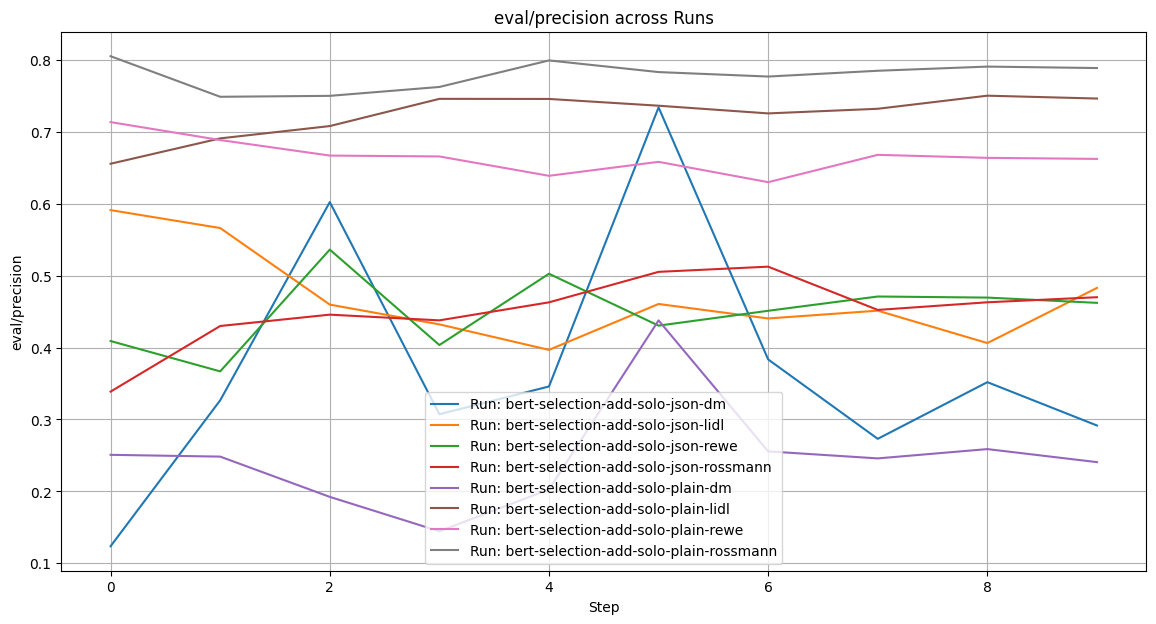

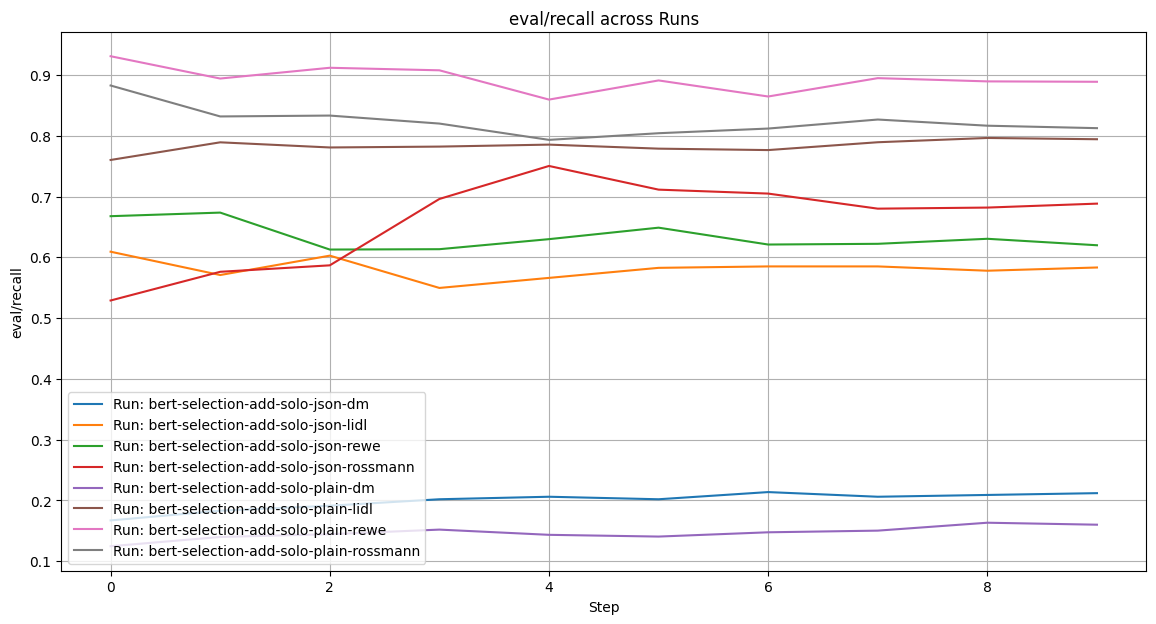

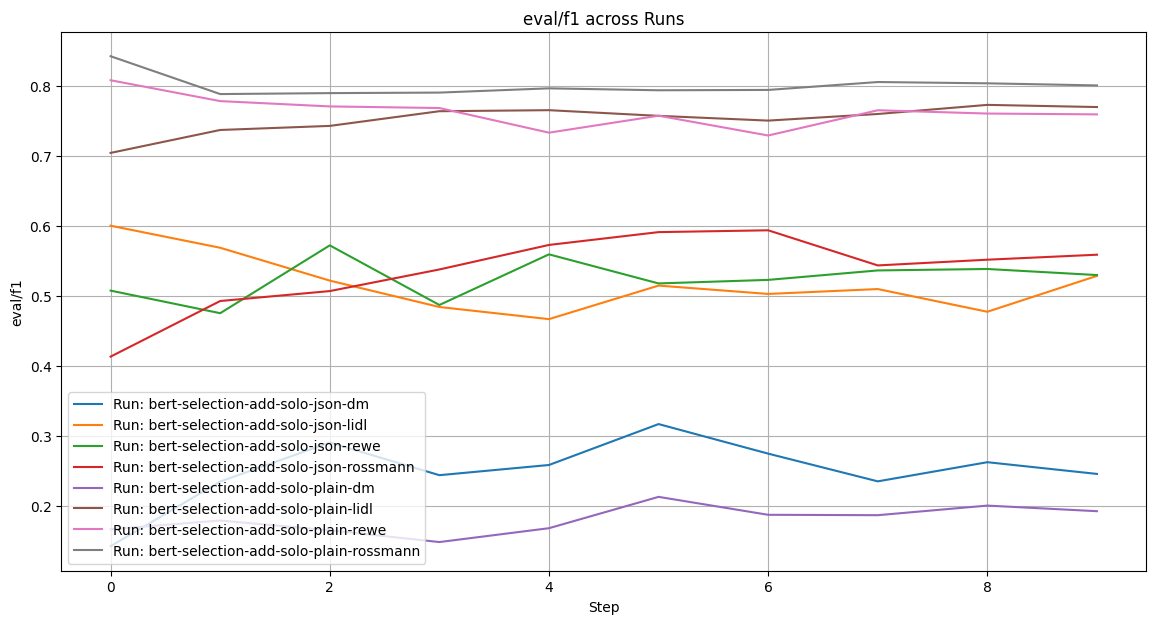

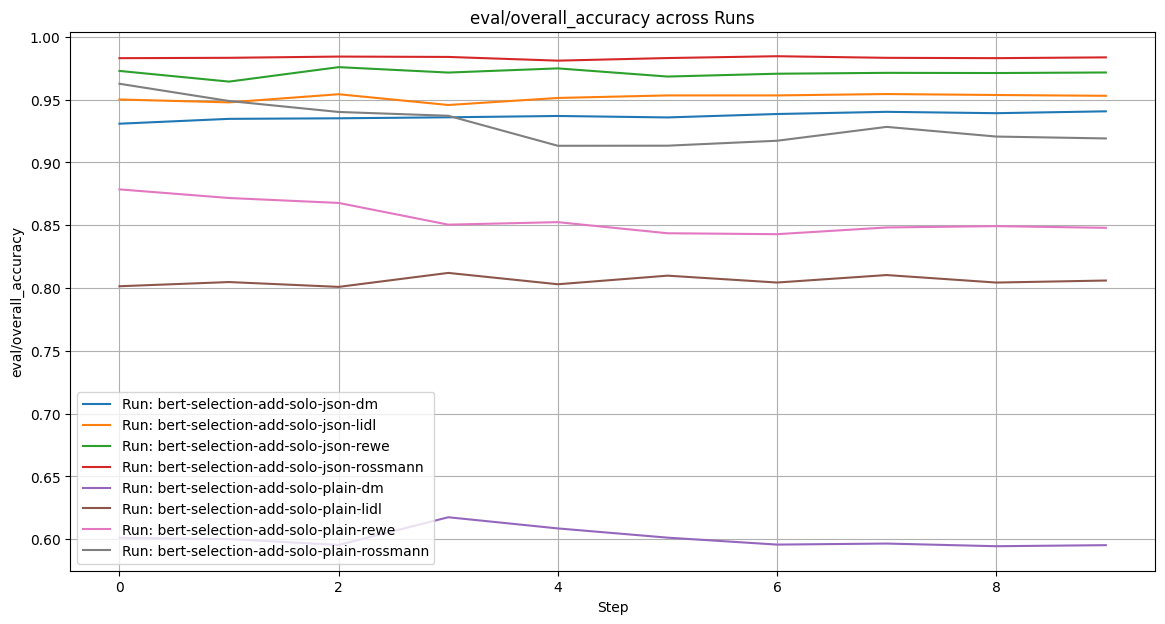

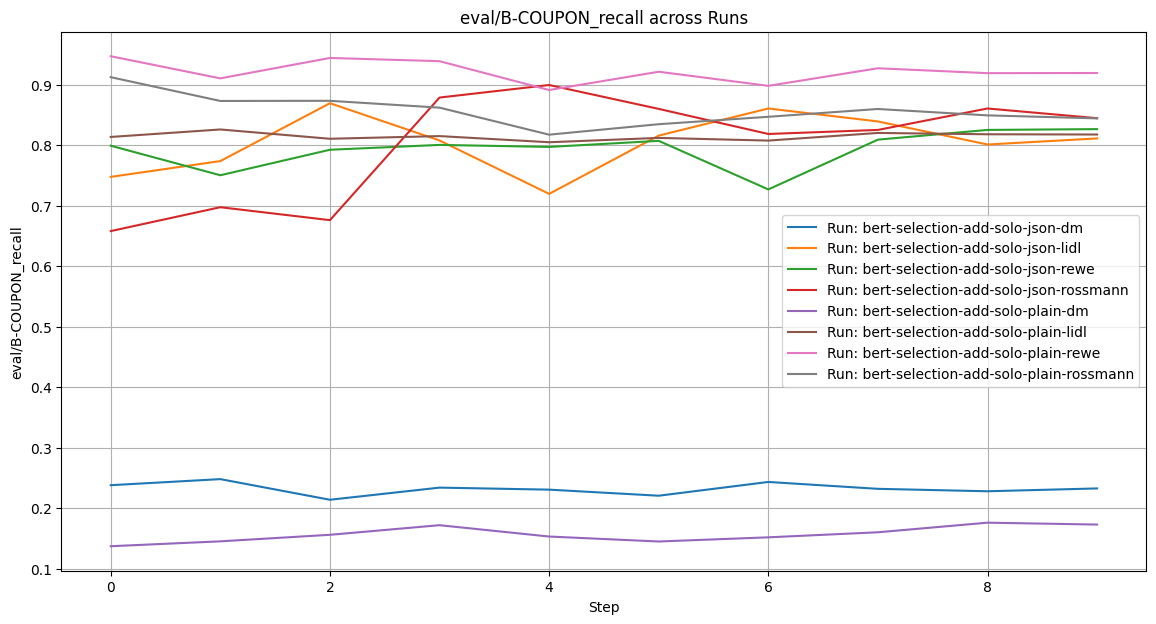

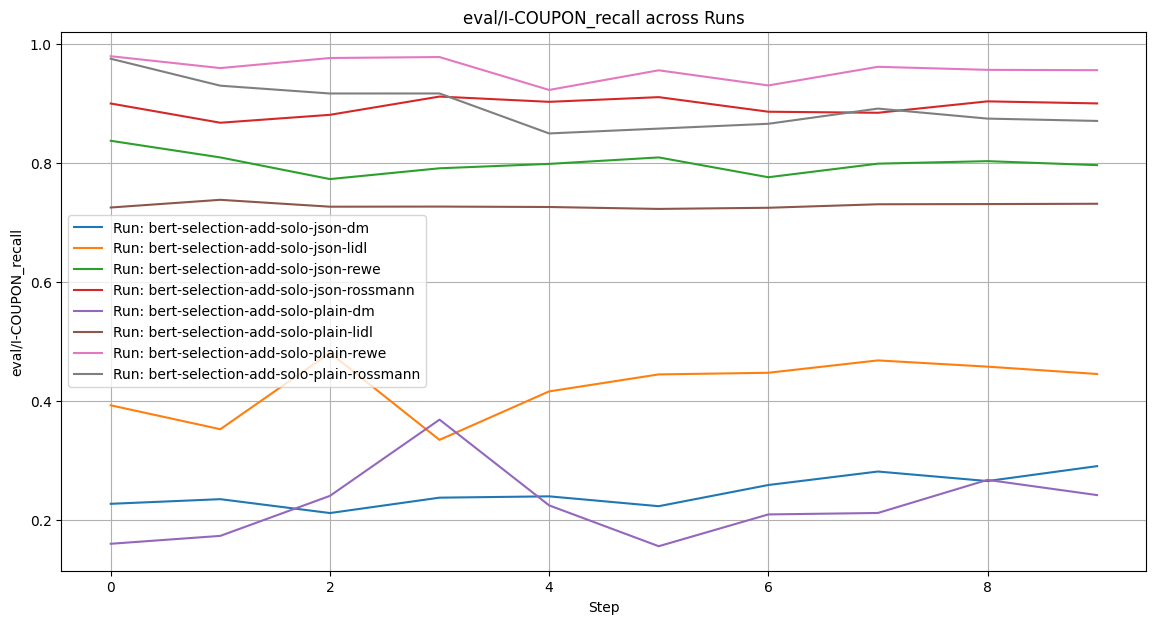

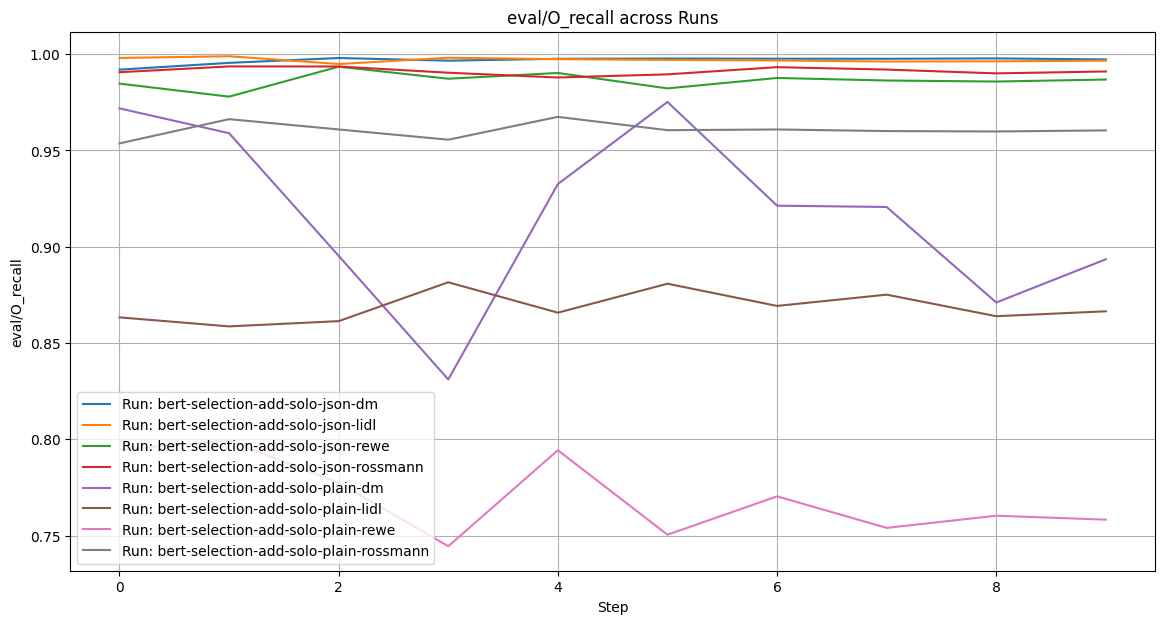

In [10]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_recall")
plot_runs_data(runs, "eval/I-COUPON_recall")
plot_runs_data(runs, "eval/O_recall")

# Incremental combined fine-tunes.
These runs were performed in the following manner:
For each dataset type (plain, json), model was first fine-tuned on the DM app,
then the same model was fine-tuned on the DM+lidl, DM+lidl_rewe, and then DM=lidl+rewe+rossmann app data.
Model name corresponds to the dataset type, as well as the last app data added to the common ds.

In [11]:
project_name = "bert_selection_add_grow_ft"
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")

## Training results.

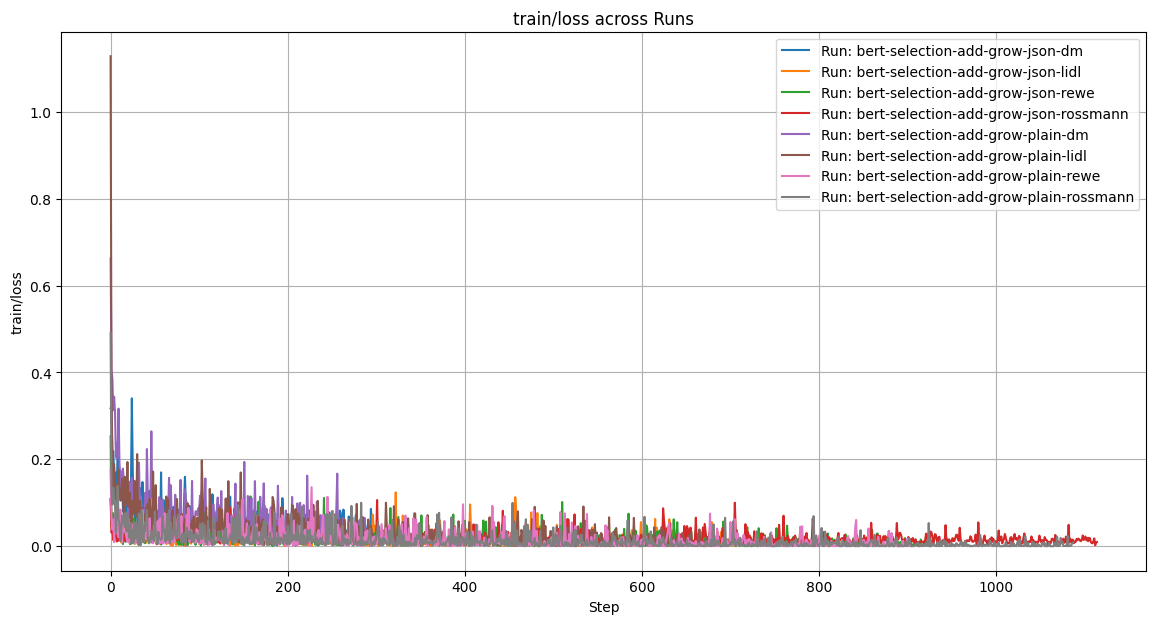

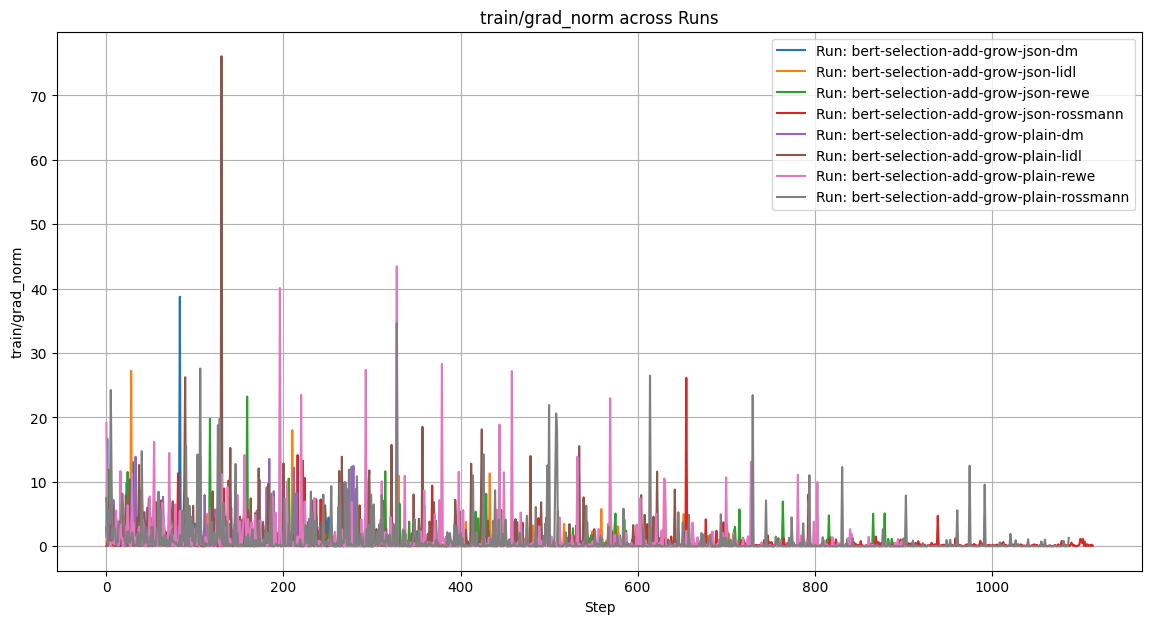

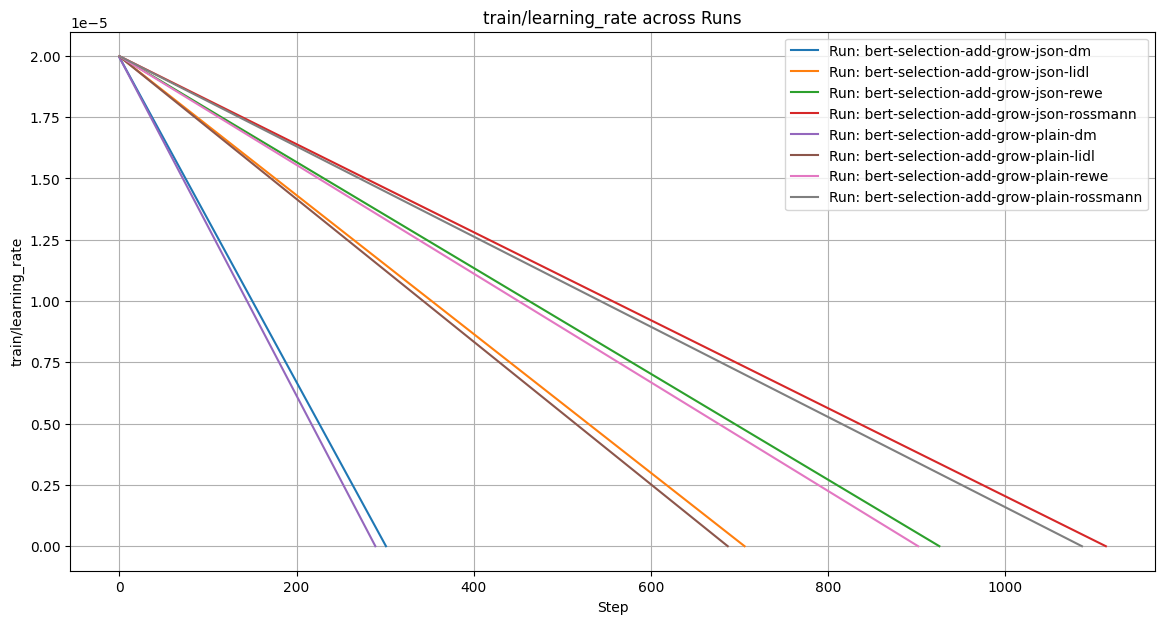

In [12]:
plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

## Evaluation results.

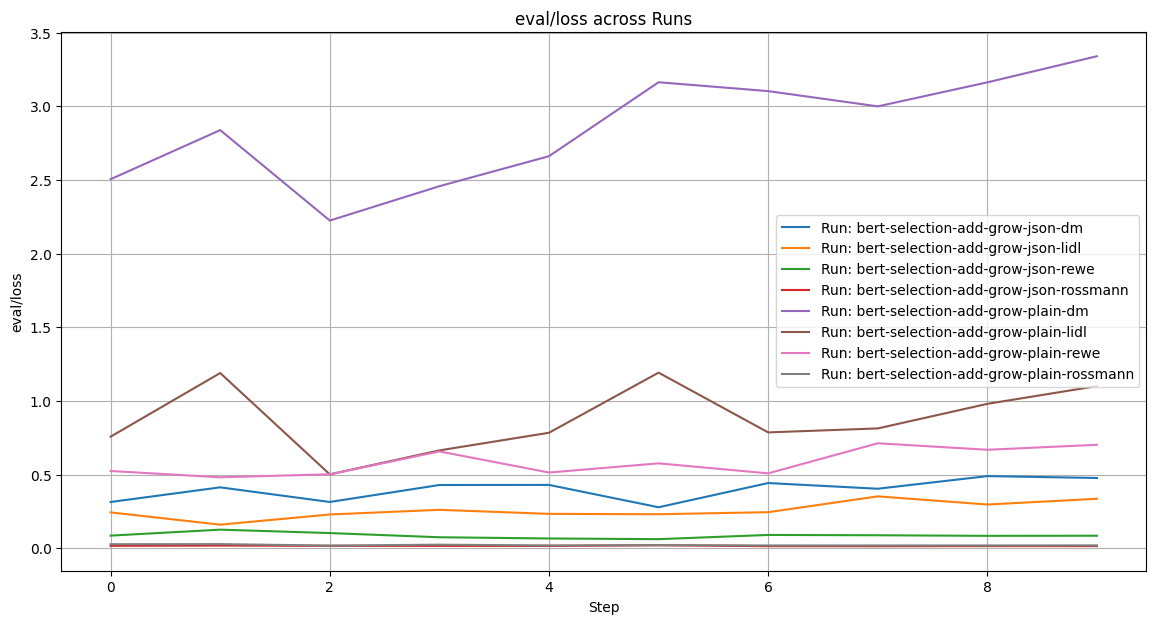

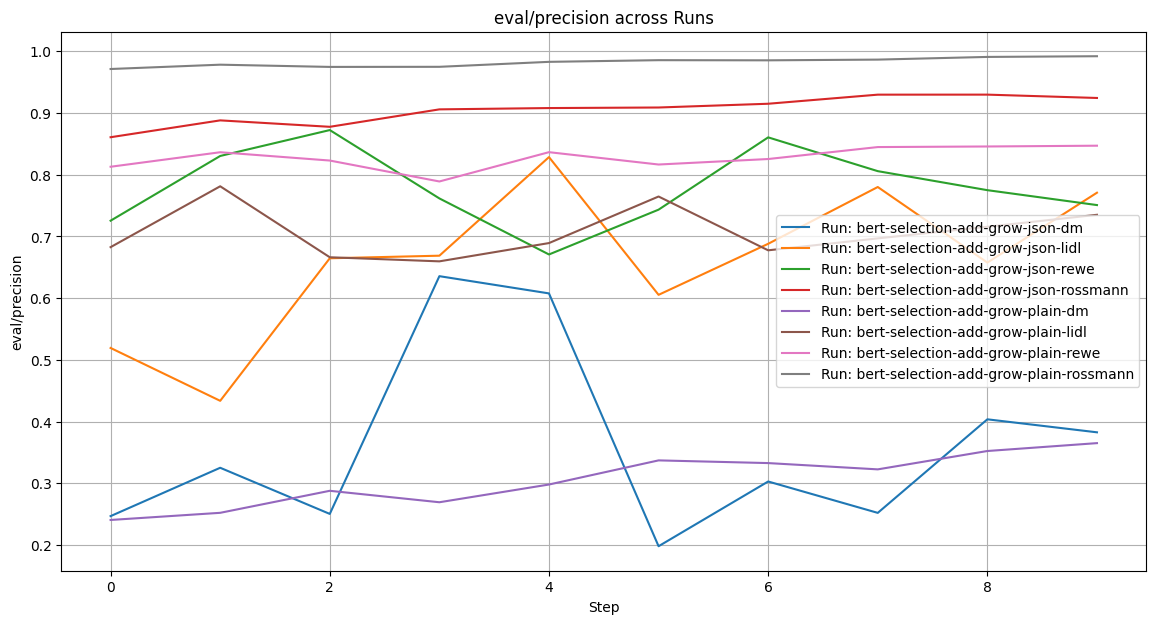

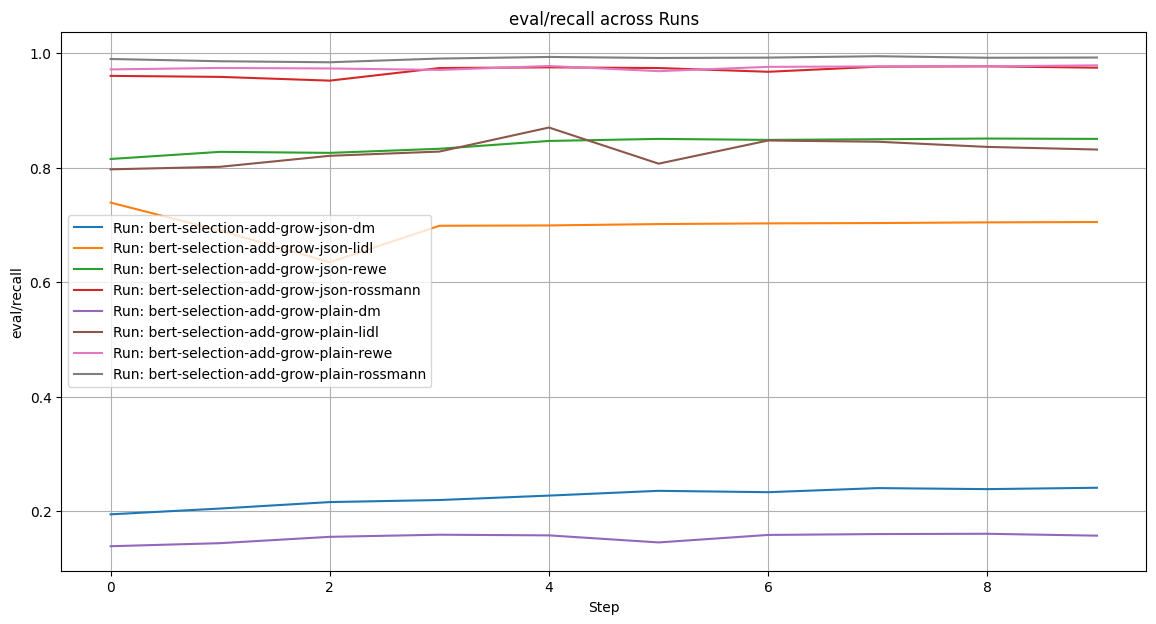

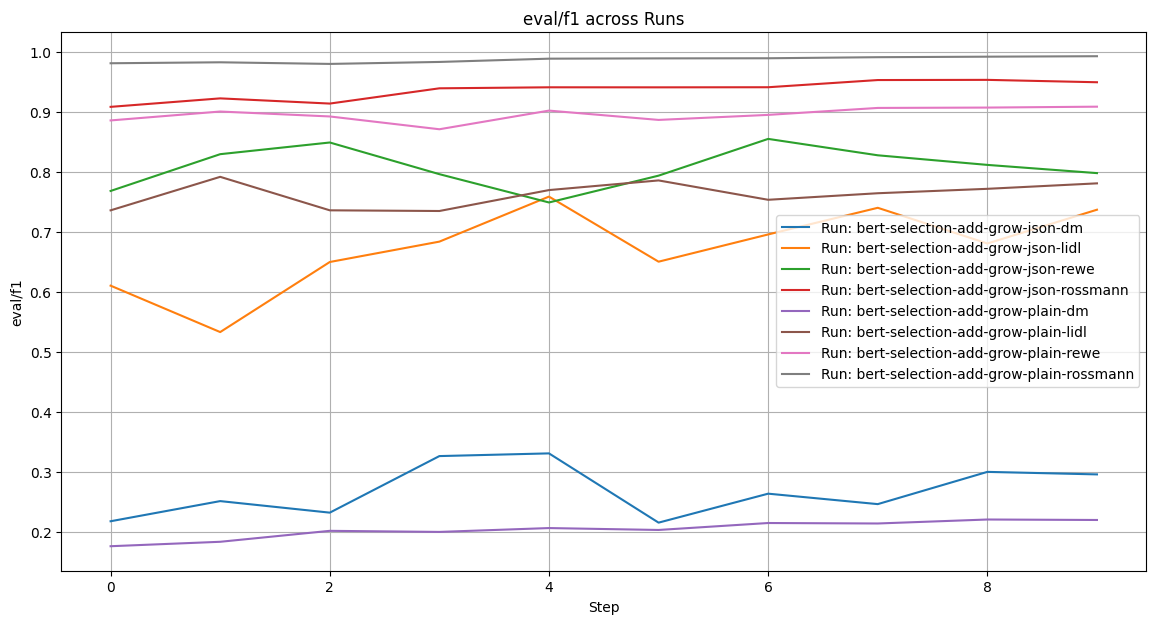

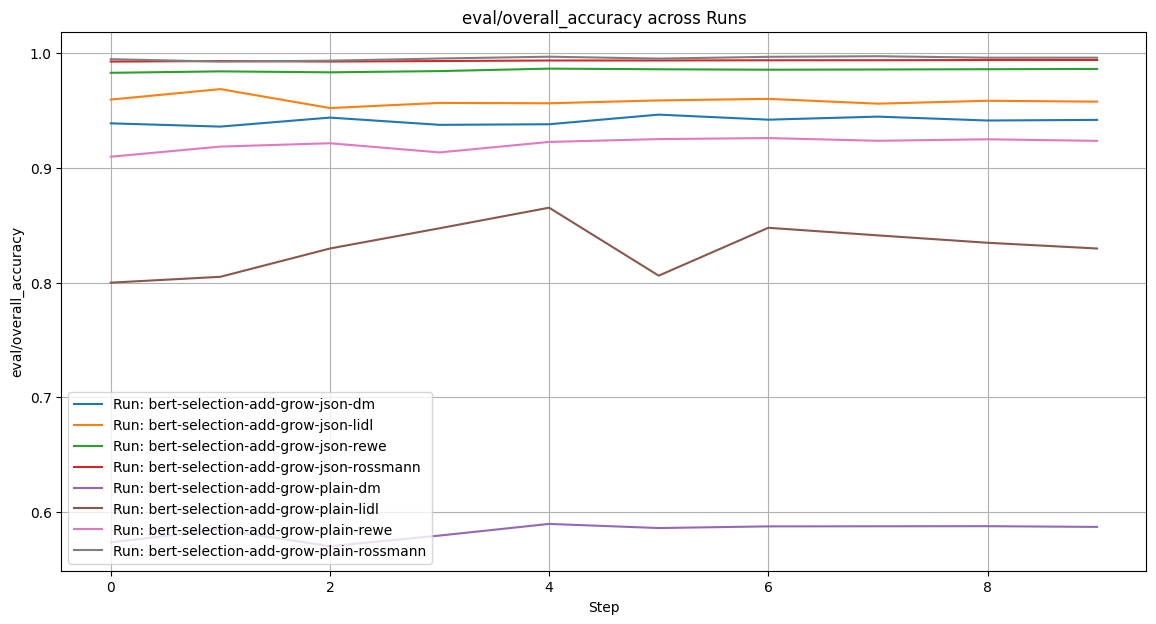

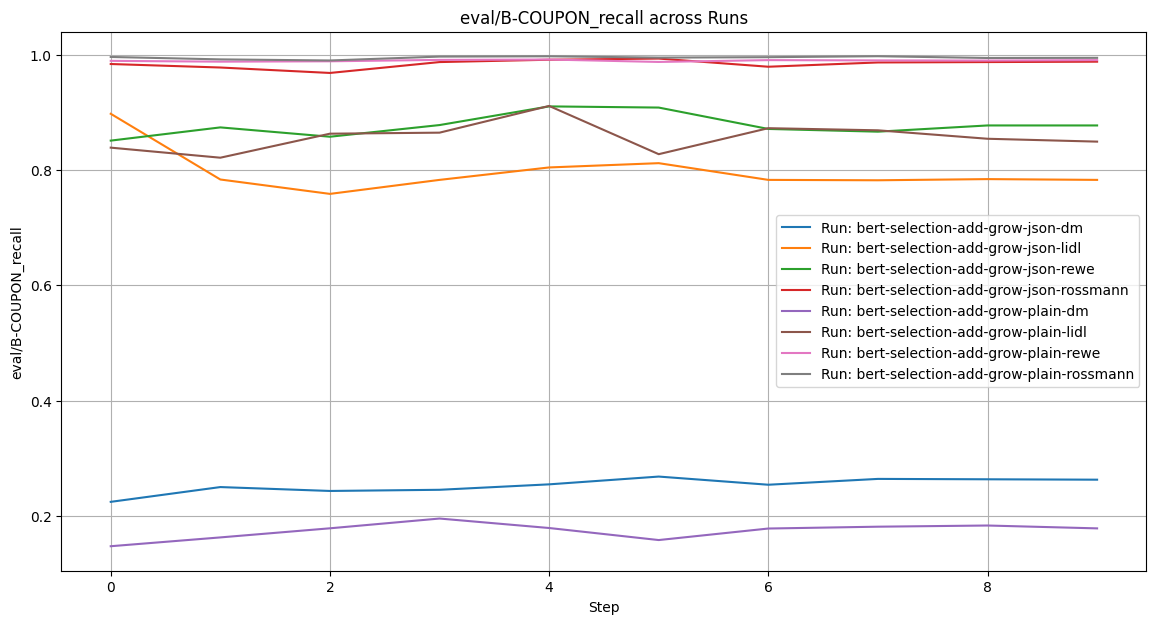

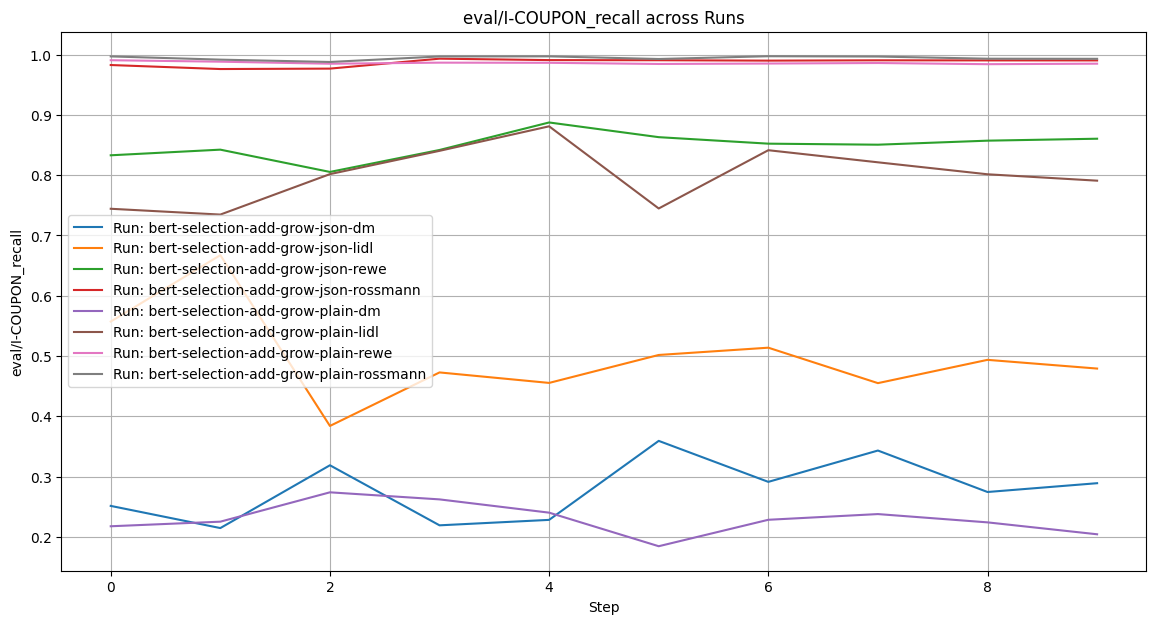

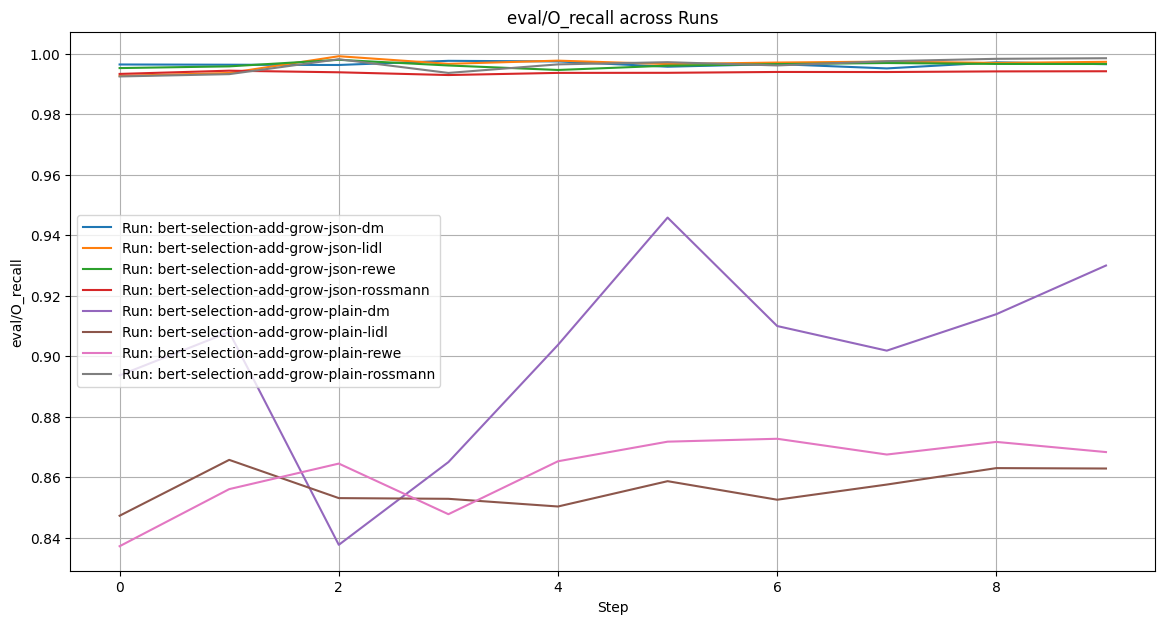

In [13]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_recall")
plot_runs_data(runs, "eval/I-COUPON_recall")
plot_runs_data(runs, "eval/O_recall")

# Vibe check
Such high results for the plain text format are suspicious. In order to verify them, I used the code below to compare the model's predictions with the ground truth.

In [14]:
def __align_labels_with_tokens(labels: list, word_ids: list, bi_split: bool) -> list[int]:
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            if not bi_split:
                if label > 0: # If the label is not O or N/A
                    label = 2*label - 1 # Change it to B-XXX
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else: # Same word as previous token
            label = labels[word_id]
            if not bi_split:
                label = 2*label
            else: # Adjust so that one word has only one B-X token.
                if label%2 == 1: # I-X are even; Unknown is even also. B-X is odd.
                    label += 1 # from (2*label)-1 to 2*label
            new_labels.append(label)

    return new_labels

In [15]:
model = AutoModelForTokenClassification.from_pretrained("zpp-murmuras/bert-selection-plain-no_curr-rev2", token=hf_token)
dataset = load_dataset("zpp-murmuras/coupon_select_big_plain_rev2", token=hf_token)
tokenizer = AutoTokenizer.from_pretrained("zpp-murmuras/bert-selection-plain-no_curr-rev2", token=hf_token)

sample = dataset['dm']
text_input = sample["texts"][11]
label_input = sample["labels"][11]

tokenized_input = tokenizer(text_input, is_split_into_words=True, return_tensors="pt")
word_ids = tokenized_input.word_ids(batch_index=0)
prepared_labels = __align_labels_with_tokens(label_input, word_ids, True)
pred2 = model(**tokenized_input)
logits = pred2.logits
predicted_labels = torch.argmax(logits, axis=2)
total = 0
correct = 0
for a, b in zip(prepared_labels, predicted_labels[0]):
    if a == b:
        correct += 1
print(f"Accuracy: {correct/len(prepared_labels)}")

Accuracy: 0.9864864864864865


Index 11 was chosen by me so that the example contains coupon data. It seems that our model really is able to predict the labels with high accuracy.